In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load dataset
solarpowergeneration = "solarpowergeneration.csv"
df = pd.read_csv(solarpowergeneration)

In [9]:
# Rename columns for easier access
df.rename(columns={
    "distance-to-solar-noon": "distance_to_solar_noon",
    "wind-direction": "wind_direction",
    "wind-speed": "wind_speed",
    "sky-cover": "sky_cover",
    "average-wind-speed-(period)": "average_wind_speed",
    "average-pressure-(period)": "average_pressure",
    "power-generated": "power_generated"
}, inplace=True)

In [10]:
# Handle missing value in average_wind_speed by filling with median
df['average_wind_speed'].fillna(df['average_wind_speed'].median(), inplace=True)

<ipython-input-10-78fe440bc42c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['average_wind_speed'].fillna(df['average_wind_speed'].median(), inplace=True)


In [11]:
# Set seaborn style
sns.set_style("whitegrid")

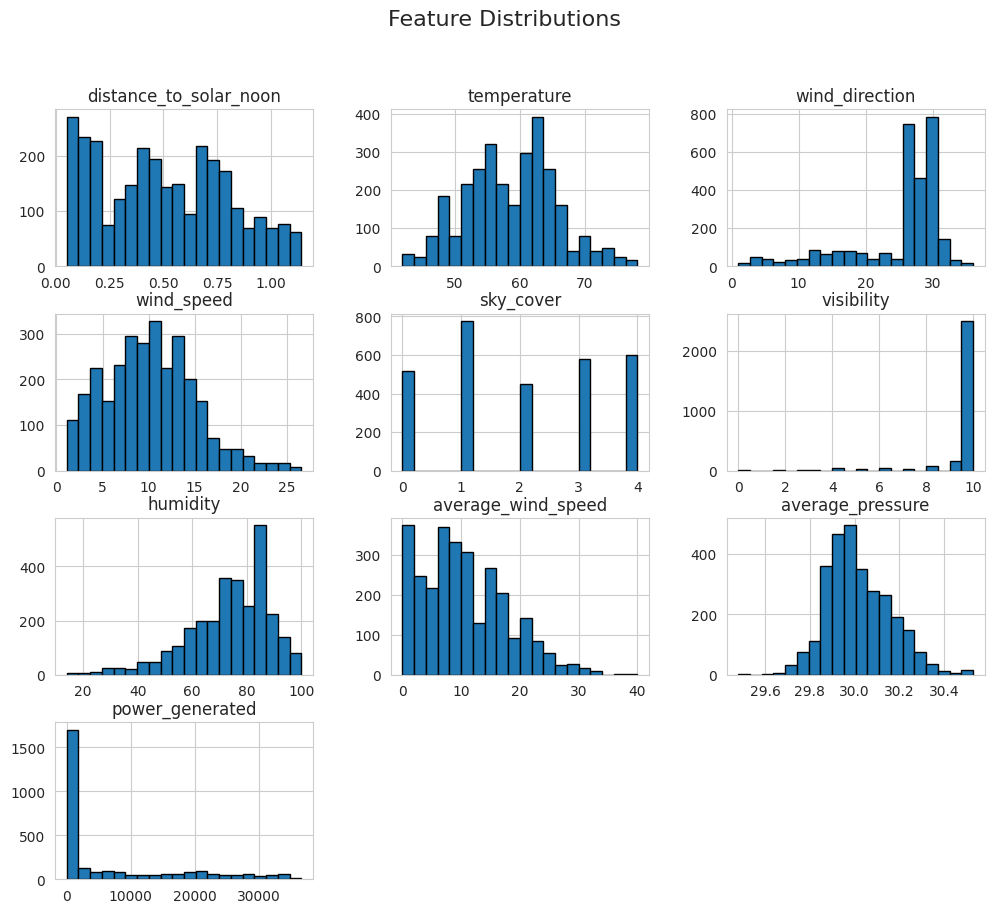

In [12]:
# 1. Histograms for numerical variables
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

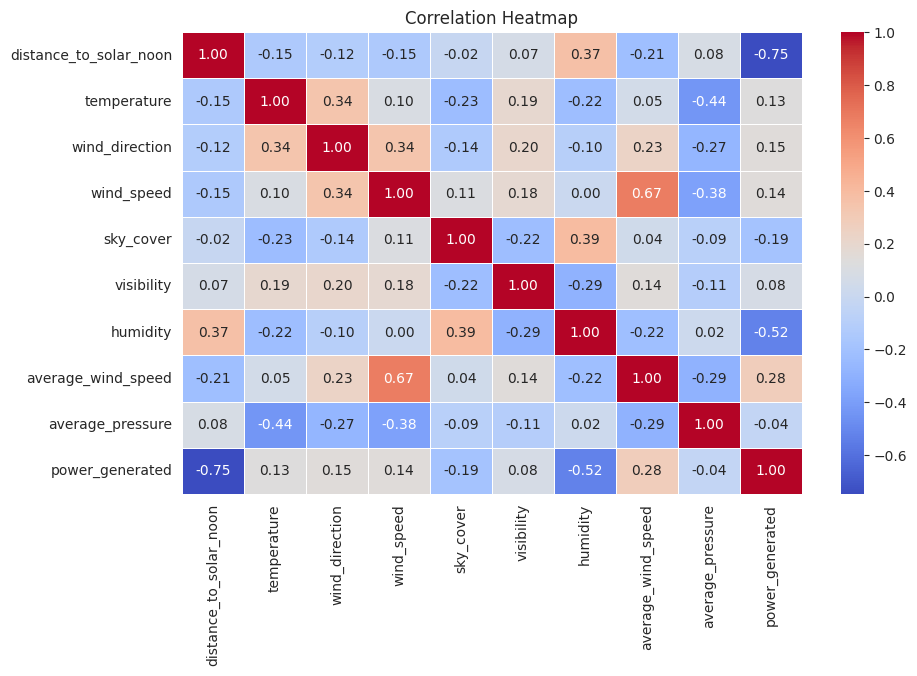

In [13]:
# 2. Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

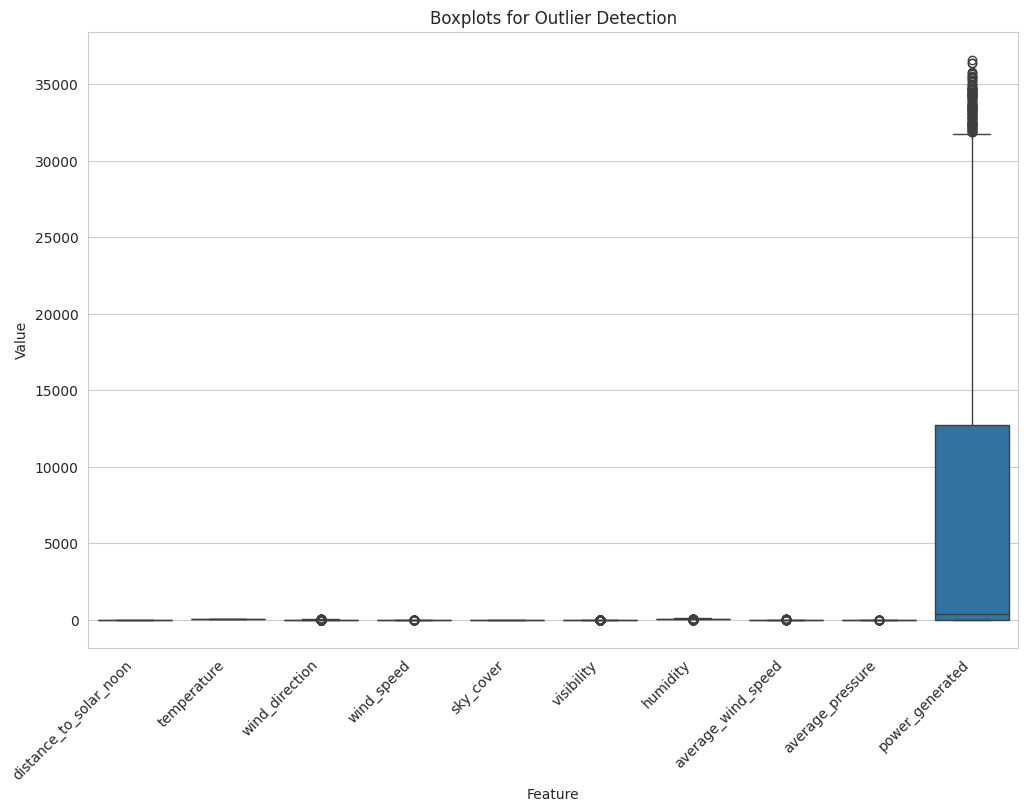

In [14]:
# 3. Boxplots to detect outliers
plt.figure(figsize=(12, 8))
df_melted = df.melt(var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", data=df_melted)
plt.xticks(rotation=45, ha='right')
plt.title("Boxplots for Outlier Detection")
plt.show()